<h1 style="text-align: center;"> <b> Parkinson's Disease Predictive Machine Learning Model </b></h1>

<h2 style="text-align: center;"> PART 1. Data Cleaning and Exploratory Data Analysis (EDA) </h2>

<h5 style="text-align: center;"> Luna Pérez Troncoso </h5>

<br/><br/>

#### **Introduction**   


Parkinson’s disease is a **progressive neurodegenerative disorder** that primarily affects the brain regions responsible for movement control. It occurs when the **neurons that produce dopamine**, a key neurotransmitter involved in coordinating smooth and balanced muscle activity, **begin to deteriorate** over time.

The condition is typically characterized by a combination of **motor symptoms**, such as tremor, muscle rigidity, bradykinesia (slowness of movement), and postural instability. Many individuals also experience **non-motor symptoms**, including sleep disturbances, cognitive changes, mood alterations, and autonomic dysfunction.

Although the exact cause of Parkinson’s disease remains unknown, research suggests a **multifactorial origin involving genetic, environmental**, and **age-related factors**. While there is currently no cure, early detection and comprehensive clinical management can significantly improve quality of life and slow symptom progression.

The **early detection of PD** is a growing priority within both clinical practice and research, as the condition often progresses silently before clear symptoms emerge. Despite advances in medical imaging and neurological assessment, **many individuals remain undiagnosed until the disease has already progressed**, limiting the effectiveness of available therapeutic interventions. Consequently, **timely diagnosis** can significantly **influence patient outcomes and long-term quality of life**. Developing a **predictive model** for Parkinson’s disease therefore represents a crucial step toward identifying individuals at risk long before traditional diagnostic criteria are met.

A reliable predictive system has the potential to support clinicians in recognizing subtle signs that might otherwise go unnoticed. Early identification could allow for **timelier monitoring, lifestyle adjustments, and targeted therapeutic strategies** that may slow **disease progression or improve quality of life**. Additionally, predictive modeling can help researchers **gain deeper insight into the complex interactions that contribute to the onset of neurodegenerative disorders**.

Beyond clinical impact, creating a predictive model encourages the integration of modern **data-driven approaches** into neurological healthcare. As medicine increasingly embraces digital tools, predictive modeling stands out as a promising path to **more personalized and proactive patient care**. In the context of Parkinson’s disease, such a model could become an **essential component of future screening programs**, ultimately **contributing to earlier intervention**, improved outcomes, and a more informed understanding of this challenging condition.

A set of demographic, lifestyle, clinical, cognitive, and symptom-related variables collected from a patient cohort, was used in this project. By integrating these diverse variables into a unified predictive framework, the project seeks to **evaluate multiple machine learning algorithms** and determine their capability to accurately identify patients at risk. The goal is not only to achieve strong **predictive performance** but also to explore **feature importance** and interpretability, enabling clinicians and researchers to better understand which factors contribute most meaningfully to diagnostic outcomes. Ultimately, this work aims to support the development of practical, **data-driven tools** that may assist in earlier and more reliable detection of Parkinson’s disease.


#### **Preparation, data collection and data loading**

In this jupyter notebook we are going to use Numpy and Pandas libraries in orden to load, clean, clasify and operate with data. Matplotlib and Seaborn libraries are requiered for graphical representation.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


As part of this project, I selected a [**synthetic dataset from Kaggle**](https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis) generated by Mr. Rabie El Kharoua, to support the development of a predictive model for Parkinson’s disease. From a data science perspective, **this choice was driven by several important considerations:**

1. Working with **real patient data typically involves strict privacy regulations**, including HIPAA, GDPR, and institutional review requirements. These constraints make it difficult to share datasets publicly, reproduce analyses, or collaborate openly. Since one of my objectives was to create a **fully transparent and shareable workflow, using synthetic data ensured** that the entire project, including the dataset, code, and results, could be made **publicly available without violating confidentiality or ethical standards**.Ç

2. High-quality **synthetic datasets offer a practical alternative when real medical data is not accessible**. They are designed to mimic the statistical behavior and structure of real-world clinical information while removing any identifiable patient details. This makes them suitable for exploratory modeling, feature evaluation, and methodological experimentation. 
   
3. Using a Kaggle dataset allowed me to **create a resource that is open, reproducible, and widely accessible to other researchers and practitioners**. This supports the broader goal of making the project approachable to anyone who wants to understand, replicate, or extend the analysis.

Overall, the use of synthetic data enabled a balance between **ethical responsibility** and **scientific transparency**, allowing the project to remain publicly sharable while still demonstrating the workflow of developing a predictive model for Parkinson's disease.

In [3]:
df=pd.read_csv("../data/raw.csv")

#### **Initial Data exploration**
   
The dataset includes a wide range of features that capture different dimensions of patient health: **Demographic variables, Lifestyle Factors, Medical History, Clinical Meassurements, Cognitive and Functional Assessments and Symptom indicators.** The features and categorical data encoding are the following:
   
**Patient ID**
- **PatientID:** A unique identifier assigned to each patient (3058 to 5162).

**Demographic Details**
- **Age:** The age of the patients ranges from 50 to 90 years.
- **Gender:** Gender of the patients  
  - 0: Male  
  - 1: Female
- **Ethnicity:**  
  - 0: Caucasian  
  - 1: African American  
  - 2: Asian  
  - 3: Other
- **EducationLevel:**  
  - 0: None  
  - 1: High School  
  - 2: Bachelor's  
  - 3: Higher

**Lifestyle Factors**
- **BMI:** Body Mass Index (15–40).
- **Smoking:**  
  - 0: No  
  - 1: Yes
- **AlcoholConsumption:** Weekly alcohol consumption in units (0–20).
- **PhysicalActivity:** Weekly physical activity in hours (0–10).
- **DietQuality:** Diet quality score (0–10).
- **SleepQuality:** Sleep quality score (4–10).

**Medical History**
- **FamilyHistoryParkinsons:**  
  - 0: No  
  - 1: Yes
- **TraumaticBrainInjury:**  
  - 0: No  
  - 1: Yes
- **Hypertension:**  
  - 0: No  
  - 1: Yes
- **Diabetes:**  
  - 0: No  
  - 1: Yes
- **Depression:**  
  - 0: No  
  - 1: Yes
- **Stroke:**  
  - 0: No  
  - 1: Yes

**Clinical Measurements**
- **SystolicBP:** 90–180 mmHg
- **DiastolicBP:** 60–120 mmHg
- **CholesterolTotal:** 150–300 mg/dL
- **CholesterolLDL:** 50–200 mg/dL
- **CholesterolHDL:** 20–100 mg/dL
- **CholesterolTriglycerides:** 50–400 mg/dL

**Cognitive and Functional Assessments**
- **UPDRS:** 0–199 (higher = greater severity)
- **MoCA:** 0–30 (lower = cognitive impairment)
- **FunctionalAssessment:** 0–10 (lower = greater impairment)

**Symptoms**
- **Tremor:** 0 = No, 1 = Yes  
- **Rigidity:** 0 = No, 1 = Yes  
- **Bradykinesia:** 0 = No, 1 = Yes  
- **PosturalInstability:** 0 = No, 1 = Yes  
- **SpeechProblems:** 0 = No, 1 = Yes  
- **SleepDisorders:** 0 = No, 1 = Yes  
- **Constipation:** 0 = No, 1 = Yes  

**Diagnosis Information**
- **Diagnosis:** 0 = No Parkinson's Disease, 1 = Parkinson's Disease Diagnosed

**Confidential Information**
- **DoctorInCharge:** Confidential; value is "DrXXXConfid" for all patients.


In [11]:
df

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0      85       0          3               1  19.619878        0   
1      75       0          0               2  16.247339        1   
2      70       1          0               0  15.368239        0   
3      52       0          0               0  15.454557        0   
4      87       0          0               1  18.616042        0   
...   ...     ...        ...             ...        ...      ...   
2100   87       1          0               2  38.483841        0   
2101   67       0          0               1  33.694396        1   
2102   65       0          0               2  22.829631        0   
2103   61       1          0               0  16.871030        1   
2104   56       0          0               2  16.569934        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0               5.108241          1.380660     3.893969      9.283194  ...   
1               6.027648          8.409804     8.513428      5.602470  ...   
2               2.242135          0.213275     6.498805      9.929824  ...   
3               5.997788          1.375045     6.715033      4.196189  ...   
4               9.775243          1.188607     4.657572      9.363925  ...   
...                  ...               ...          ...           ...  ...   
2100           12.674393          5.325900     5.947278      6.296231  ...   
2101            0.977018          0.108599     4.825187      6.342325  ...   
2102            6.152286          5.775103     0.334244      9.740019  ...   
2103            0.292094          2.280475     9.598513      8.289390  ...   
2104            1.985084          1.400441     9.883835      9.930037  ...   

           MoCA  FunctionalAssessment  Tremor  Rigidity  Bradykinesia  \
0     29.181289              1.572427       1         0             0   
1     12.332639              4.787551       0         1             0   
2     29.927783              2.130686       1         0             0   
3     21.304268              3.391288       1         1             1   
4      8.336364              3.200969       0         0             0   
...         ...                   ...     ...       ...           ...   
2100  28.634010              8.076254       1         0             0   
2101  13.106537              1.665751       0         0             0   
2102  26.527734              4.785614       0         0             0   
2103  19.873404              8.378979       1         0             1   
2104  12.192612              5.015131       0         0             0   

      PosturalInstability  SpeechProblems  SleepDisorders  Constipation  \
0                       0               0               0             0   
1                       1               0               1             0   
2                       0               1               0             1   
3                       0               0               0             1   
4                       1               0               1             0   
...                   ...             ...             ...           ...   
2100                    0               1               1             0   
2101                    1               0               1             1   
2102                    0               1               1             0   
2103                    0               0               1             1   
2104                    0               1               0             1   

      Diagnosis  
0             0  
1             1  
2             1  
3             1  
4             0  
...         ...  
2100          0  
2101          1  
2102          1  
2103          1  
2104          0  

[2105 rows x 33 columns]

As we can see, two importante features of this dataset are the **UPDRS and MoCA scores**.

The **Unified Parkinson’s Disease Rating Scale (UPDRS)** is one of the most widely used clinical tools for evaluating the severity and progression of Parkinson’s disease. It provides a structured assessment across several domains that reflect both motor and non-motor symptoms. The scale helps clinicians quantify impairment, monitor disease progression, and evaluate the effectiveness of treatments.

**Main Components**

1. **Mentation, Behavior, and Mood**
   - Assesses cognitive status, emotional well-being, and psychiatric symptoms.
   - Includes items such as intellectual impairment, thought disorders, depression, and motivation.

2. **Activities of Daily Living (ADL)**
   - Measures the patient’s ability to perform basic daily tasks.
   - Evaluates speech, handwriting, dressing, hygiene, swallowing, and walking capabilities.
   - Reflects both motor and non-motor difficulties experienced in everyday life.

3. **Motor Examination**
   - Focuses on observable motor symptoms.
   - Includes tremor, rigidity, bradykinesia, posture, gait, facial expression, and coordination.
   - Often considered the core section for assessing motor dysfunction.

4. **Motor Complications**
   - Evaluates motor fluctuations and dyskinesias related to long-term treatment.
   - Includes duration, severity, predictability, and impact on daily functioning.

**Scoring**

- Each item is typically scored from **0 to 4**, where higher values indicate **greater impairment or symptom severity**.
- The total score can range broadly depending on the version used, but higher overall scores reflect more advanced disease.

**Purpose and Use**

- Provides a **comprehensive and standardized measure** of Parkinson's disease progression.
- Supports both clinical decision-making and research applications.
- Allows tracking of symptoms over time and comparison of treatment outcomes.
  

<p align="center">
  <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.carepatron.com%2Ffiles%2Fupdrs.jpg&f=1&nofb=1&ipt=374cd8bac8555bf8150c459e871185c7f79b8a54352d109db757bd499119c3ec"/>
</p> 

The **Montreal Cognitive Assessment (MoCA)** is a widely used screening tool designed to detect **mild cognitive impairment (MCI)** and early signs of dementia. It provides a rapid yet comprehensive evaluation of several cognitive domains commonly affected in neurological conditions, including Parkinson’s disease.

### Main Cognitive Domains Assessed

1. **Visuospatial and Executive Function**
   - Includes tasks such as trail making, cube copying, and clock drawing.
   - Evaluates planning, abstraction, organization, and visual–motor skills.

2. **Naming**
   - Assesses language and semantic memory through object-naming tasks using low-frequency animals.

3. **Memory**
   - Tests short-term memory and delayed recall.
   - Measures the ability to encode, store, and retrieve information.

4. **Attention**
   - Covers digit span, sustained attention, and serial subtraction tasks.
   - Evaluates concentration, working memory, and mental tracking.

5. **Language**
   - Includes sentence repetition and verbal fluency tasks.
   - Helps assess expressive language and grammatical processing.

6. **Abstraction**
   - Measures high-level reasoning through similarity-based conceptual thinking.

7. **Orientation**
   - Evaluates awareness of time and place, including date, year, location, and setting.

### Scoring

- The MoCA is scored on a **0–30 scale**.
- A score of **26 or above** is generally considered within the normal range.
- Lower scores may in

<p align="center">
  <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcbsnews2.cbsistatic.com%2Fhub%2Fi%2Fr%2F2018%2F01%2F16%2Fc72c95a8-1263-4af1-9d24-1171c4260d8a%2Fthumbnail%2F1240x1562%2Fac00f93769d9dc1c5336525df3fed3f6%2Fmoca-test.jpg&f=1&nofb=1&ipt=3e49a8b53c1dc3ee09f682ba2cecce6890923fe46ecc21f65542ad574301bba1"/>
</p> 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

As we can see **the dataset doesn't contain null values**, consequently missing value **imputation algoritms won't be necessary** in this project.
   
#### **Initial data exclusion and Train Test Split**

In order to **protect confidential information** that identifies the doctor in charge and the patient we are going to **discard** both IDs of the features **DoctorInCharge and PatientID** before spliting in train and test data.  

In [4]:
df.drop(["PatientID","DoctorInCharge"],axis=1,inplace=True)
df.to_csv('../data/processed.csv')

In the following step we are going to split the full dataset into train and test, and save in into two csv in order to use it in other steps.
   
Splitting a dataset into **training** and **test** sets is essential to ensure that a machine learning model can generalize beyond the data it was trained on. The training set is used to learn patterns, relationships, and decision boundaries, while the test set serves as an independent evaluation of how well the model performs on unseen data.

Without this separation, the model could simply memorize the training examples, leading to **overfitting** and overly optimistic performance estimates. By evaluating the model on a held-out test set, we obtain a more realistic understanding of its **true predictive capability and robustness**. This approach helps **ensure that the model is not only accurate on known data but also reliable when applied in real-world scenarios** where new, unseen cases are encountered.


In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state= 1111)
train_df.to_csv('../data/train.csv')
test_df.to_csv('../data/test.csv')

#### **Exploratory Data Analysis**

In order to avoid bias whole exploratory data analysis and data cleaning is going to be performed of the train dataset

In [8]:
del test_df
del df

These are the general statistics of the train model

In [9]:
train_df.describe()

Age       Gender    Ethnicity  EducationLevel          BMI  \
count  1684.000000  1684.000000  1684.000000     1684.000000  1684.000000   
mean     69.416271     0.492874     0.695368        1.337292    27.287885   
std      11.542764     0.500098     0.999918        0.906967     7.177259   
min      50.000000     0.000000     0.000000        0.000000    15.038069   
25%      59.000000     0.000000     0.000000        1.000000    20.938458   
50%      70.000000     0.000000     0.000000        1.000000    27.383080   
75%      79.000000     1.000000     1.000000        2.000000    33.358054   
max      89.000000     1.000000     3.000000        3.000000    39.999887   

           Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
count  1684.000000         1684.000000       1684.000000  1684.000000   
mean      0.295131           10.015190          5.008984     4.922701   
std       0.456237            5.649607          2.893284     2.876570   
min       0.000000            0.003563          0.004157     0.000011   
25%       0.000000            5.197224          2.447668     2.485497   
50%       0.000000           10.047811          5.034350     4.795591   
75%       1.000000           14.782616          7.482752     7.394776   
max       1.000000           19.979467          9.995255     9.995864   

       SleepQuality  ...         MoCA  FunctionalAssessment       Tremor  \
count   1684.000000  ...  1684.000000           1684.000000  1684.000000   
mean       7.013405  ...    15.094316              5.001666     0.433492   
std        1.767929  ...     8.702682              2.929013     0.495704   
min        4.000497  ...     0.021191              0.001505     0.000000   
25%        5.491762  ...     7.369278              2.419016     0.000000   
50%        6.949157  ...    14.998328              4.983439     0.000000   
75%        8.609825  ...    22.675771              7.473421     1.000000   
max        9.994934  ...    29.970107              9.992697     1.000000   

          Rigidity  Bradykinesia  PosturalInstability  SpeechProblems  \
count  1684.000000   1684.000000          1684.000000     1684.000000   
mean      0.247625      0.211401             0.133610        0.296318   
std       0.431761      0.408424             0.340334        0.456769   
min       0.000000      0.000000             0.000000        0.000000   
25%       0.000000      0.000000             0.000000        0.000000   
50%       0.000000      0.000000             0.000000        0.000000   
75%       0.000000      0.000000             0.000000        1.000000   
max       1.000000      1.000000             1.000000        1.000000   

       SleepDisorders  Constipation    Diagnosis  
count     1684.000000   1684.000000  1684.000000  
mean         0.249406      0.299881     0.620546  
std          0.432798      0.458342     0.485395  
min          0.000000      0.000000     0.000000  
25%          0.000000      0.000000     0.000000  
50%          0.000000      0.000000     1.000000  
75%          0.000000      1.000000     1.000000  
max          1.000000      1.000000     1.000000  

[8 rows x 33 columns]

First of all we are going to **evaluate if the sample is imbalanced**, representing the percentage of Parkinson's Disease (PD) Patients vs Healthy Patients.


Percentage of Parkinson's Disease (PD) Patients and Healthy Patients: 

No PD    37.945368
PD       62.054632
Name: Percentage (%), dtype: float64


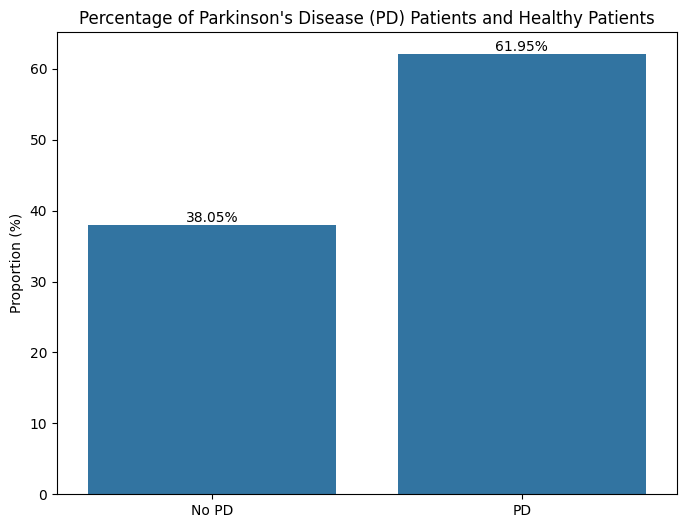

In [9]:
diagnosis_percentage=(train_df.Diagnosis.value_counts(normalize=True,ascending=True)*100)
diagnosis_percentage.index=["No PD","PD"]
diagnosis_percentage.name="Percentage (%)"
print("")
print("Percentage of Parkinson's Disease (PD) Patients and Healthy Patients: \n")
print(diagnosis_percentage)
fig, ax = plt.subplots(figsize=(8, 6))
annot_array=["38.05%","61.95%"]
sns.barplot(data=diagnosis_percentage,ax=ax)
ax.bar_label(ax.containers[-1], labels=annot_array, label_type='edge')
ax.set_ylabel("Proportion (%)");
ax.set_title("Percentage of Parkinson's Disease (PD) Patients and Healthy Patients");

As we can see 

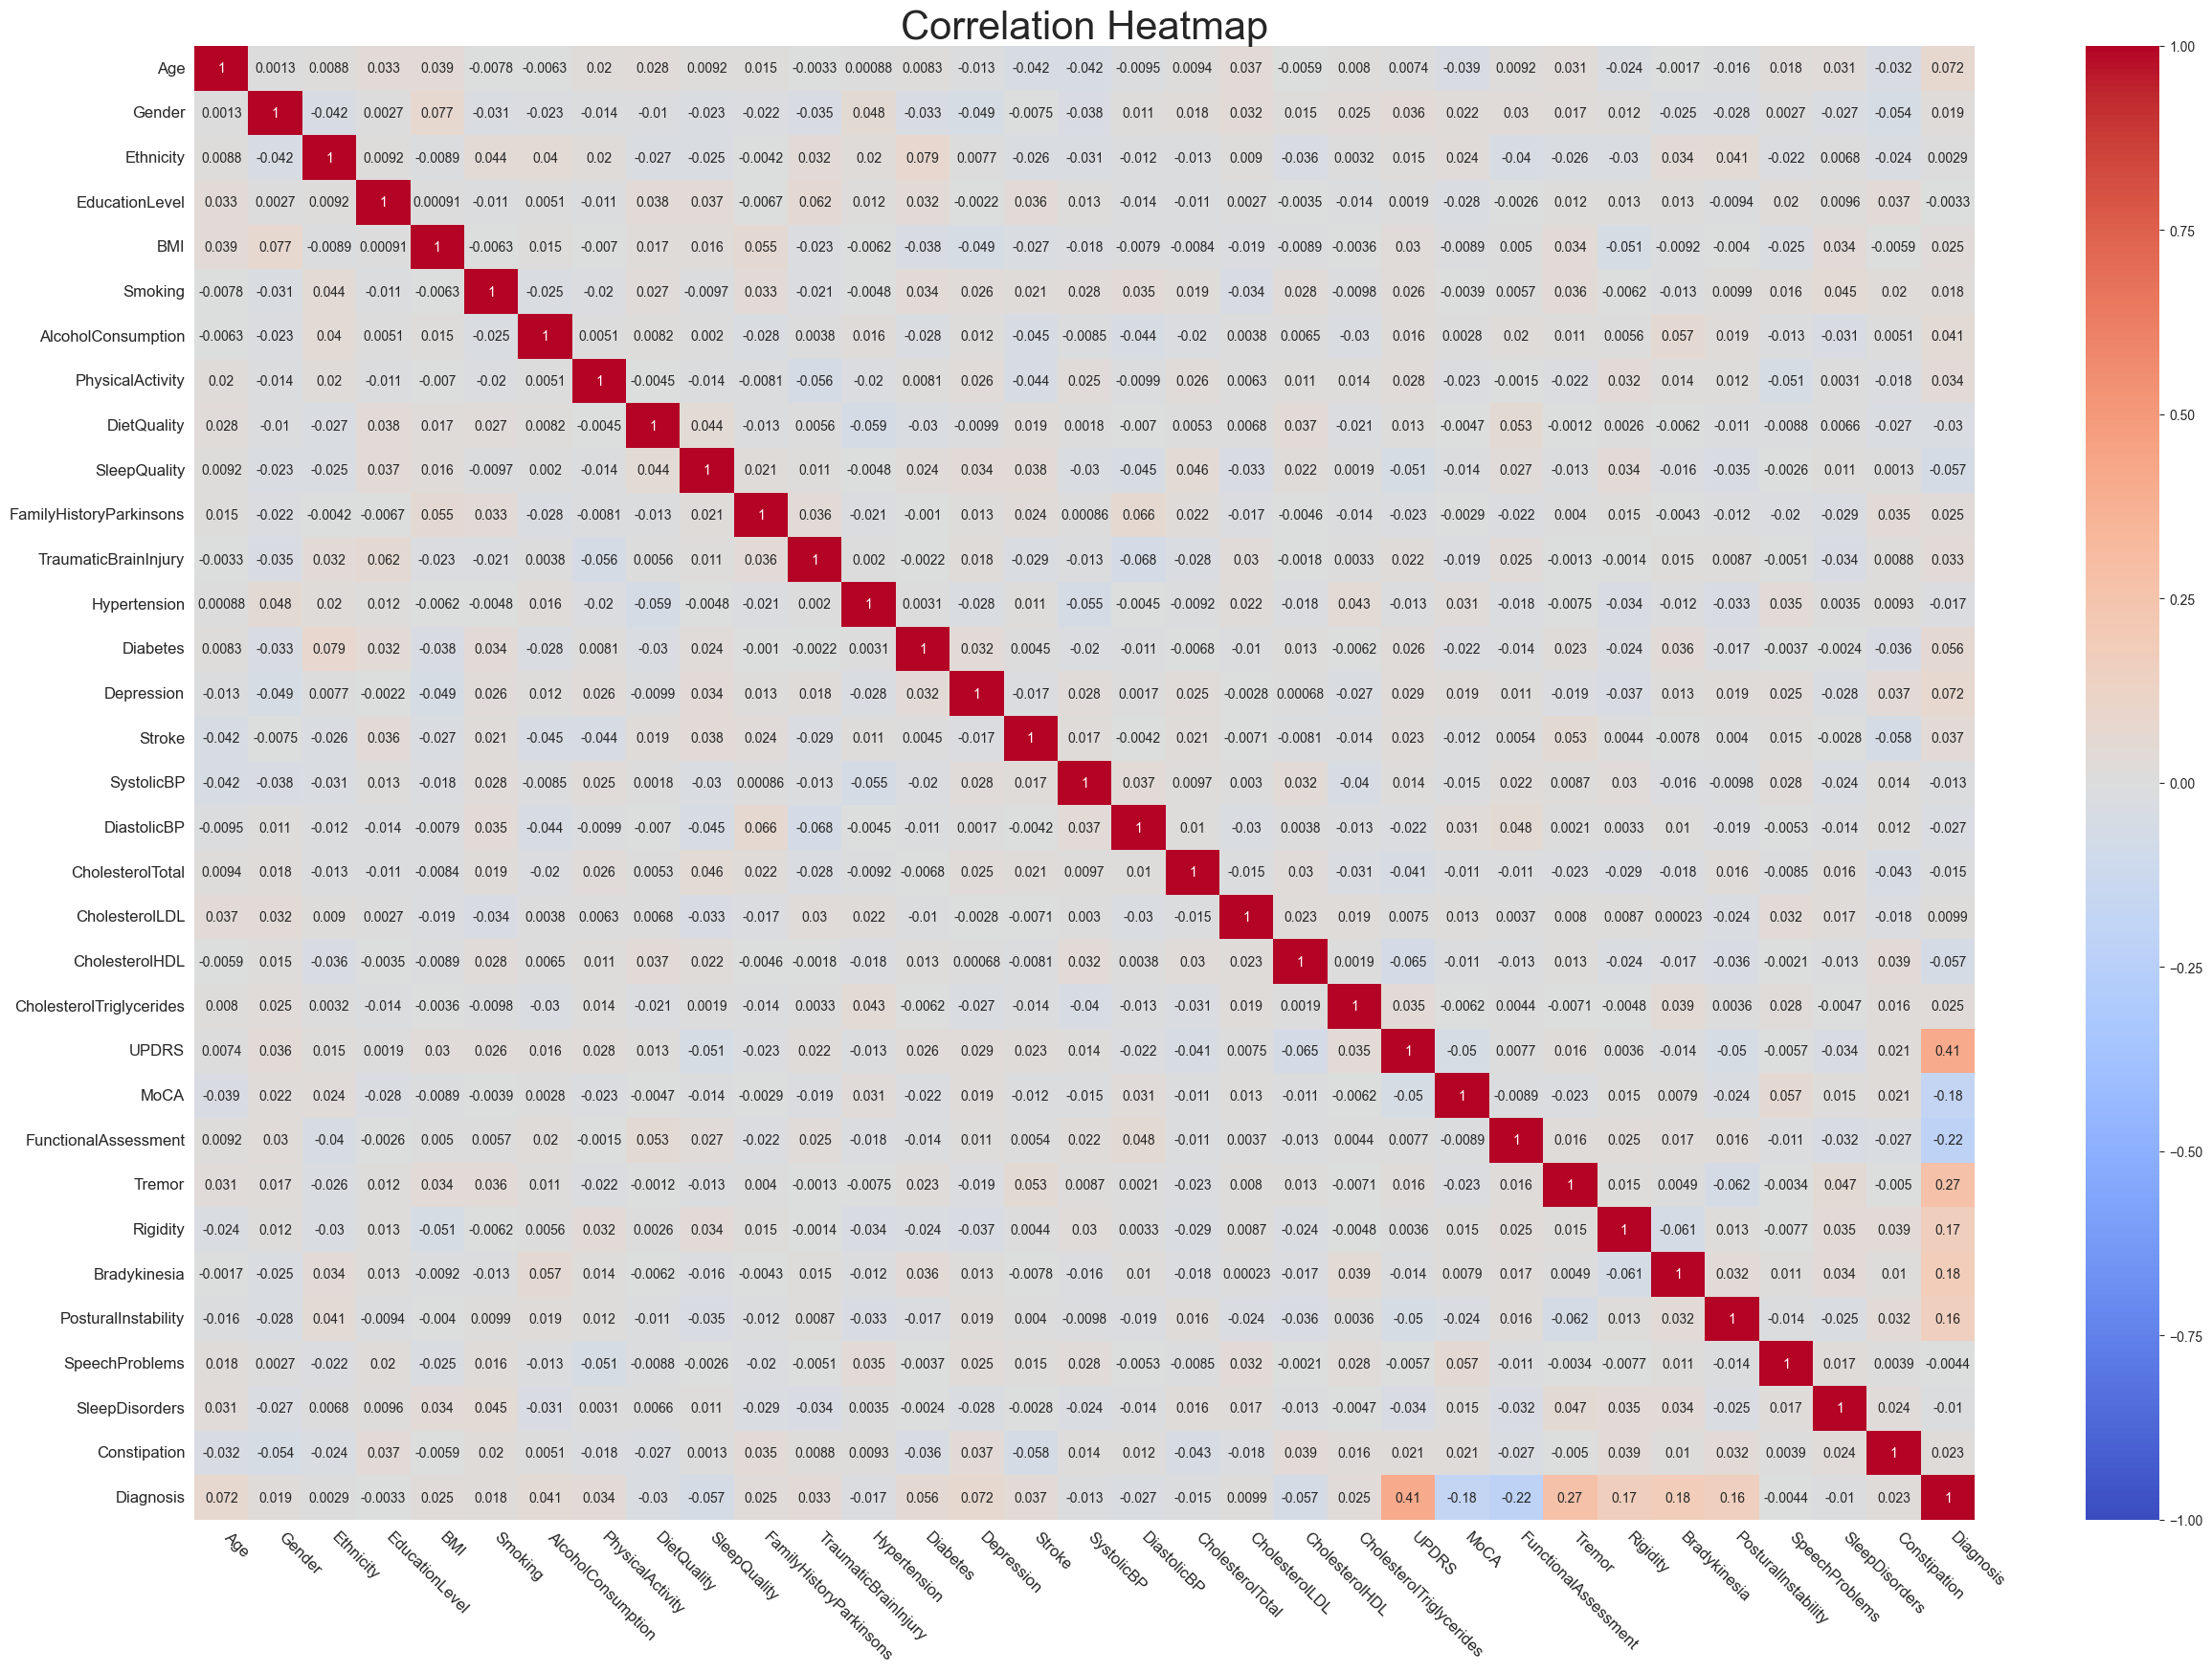

In [157]:
plt.figure(figsize=(30,20))
sns.heatmap(train_df.corr(), cmap='coolwarm',annot=True,vmin=-1,vmax=1)
plt.xticks(rotation=-45,size=12,horizontalalignment='left')
plt.yticks(size=12)
plt.title('Correlation Heatmap',fontdict={"size":30});

 In this heatmap we can observe that **Pearson correlation coefficient of the different features** without focusing on our target (Diagnosis) are really **close to 0**. This implies that **there is not multicollinearity in the data**. 

Features correlations with the target (Diagnosis)


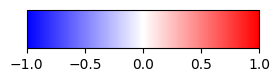

In [49]:
fig, ax = plt.subplots(figsize=(3, 0.5))
cmap = mpl.colormaps['bwr']
norm = mpl.colors.Normalize(-1, 1) 
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax,orientation='horizontal')
print("Features correlations with the target (Diagnosis)")
plt.show()
train_df.corr().iloc[-1,0:-2].to_frame().sort_values(by="Diagnosis",ascending=False).style.background_gradient(cmap=cmap, axis=0,vmin=-1,vmax=1)

Focusing on the **correlation of the target vs the different features** we can see that **any of the features have a strong correlation with the target**. Greatest correlations was seen in **UPDRS** which had a **positive correlation of 0.41**. Some **appreciable correlations** were obtained in **Tremor**(+0.271641),  **FunctionalAssessment**(-0.217524), **Bradykinesia**(+0.183083), **MoCA** (-0.179093), **Rigidity** (+0.167933), **Postural Instability** (+0.159615) and Depression(0.072315). This results matches with the more prominent syntoms of Parkinson's Disease: motor symptoms like the mentioned before, cognive impairment and emotional disturbances.  
    
On the other hand we can see **features that doesn't seem to be really correlated with Parkinson's Disease** and probably won't be useful for the predictive model, like **CholesterolLDL, Ethnicity and EducationLevel.**


In [60]:
(train_df[train_df.Diagnosis==1]["Tremor"].value_counts(normalize=True)*100).values

array([53.87559809, 46.12440191])

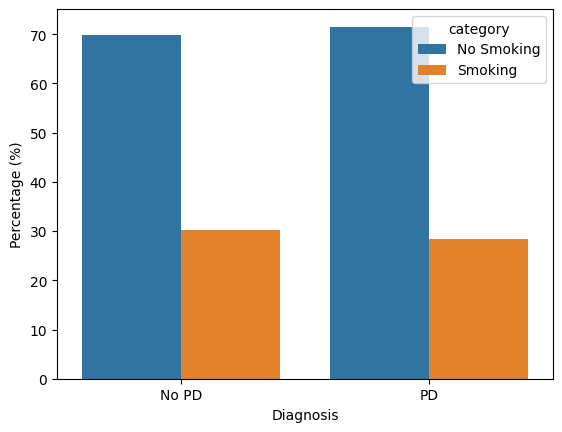

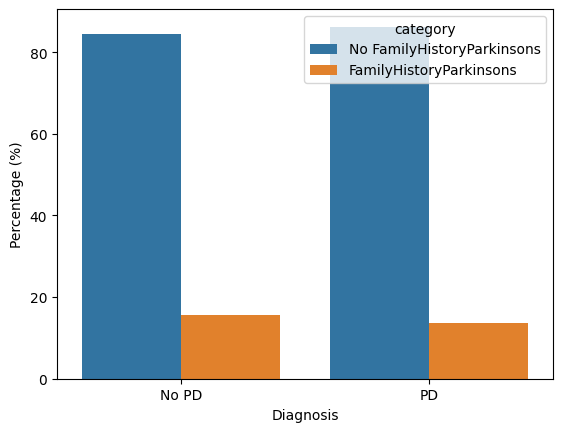

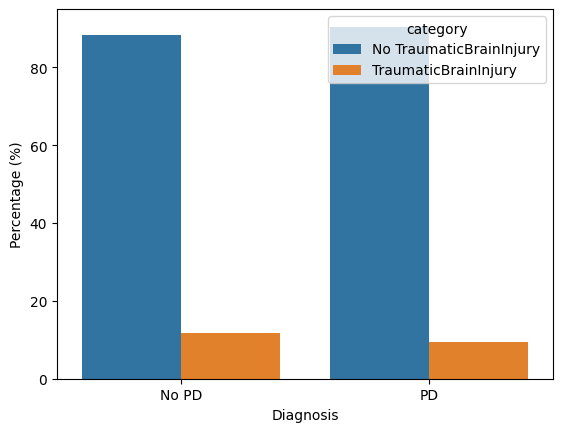

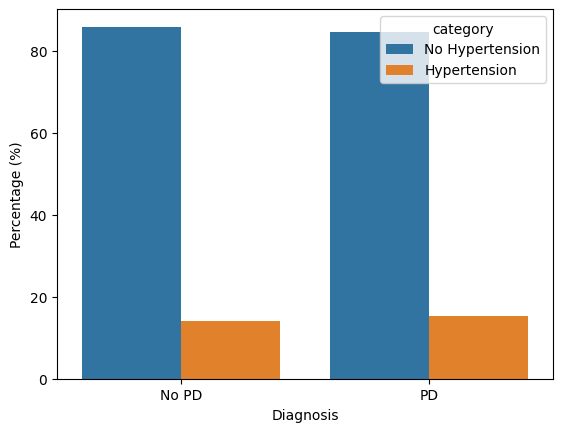

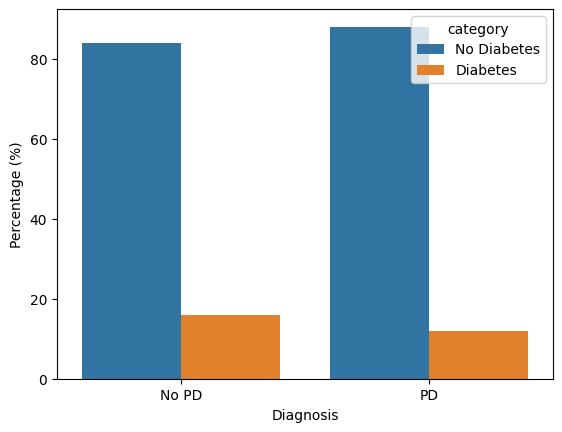

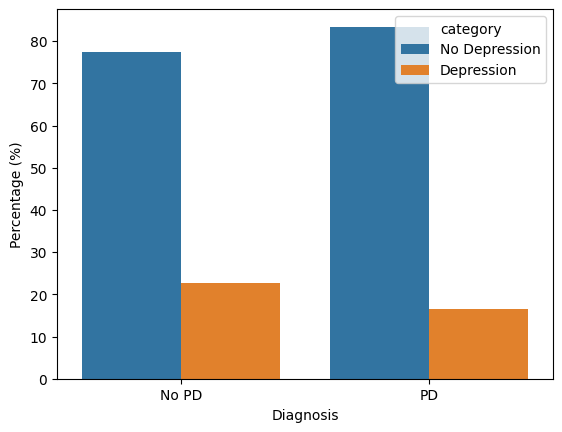

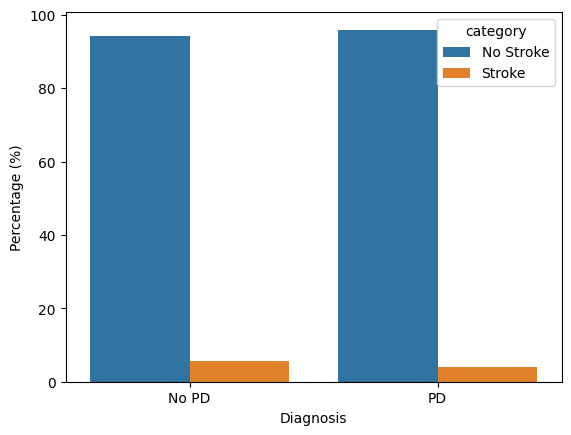

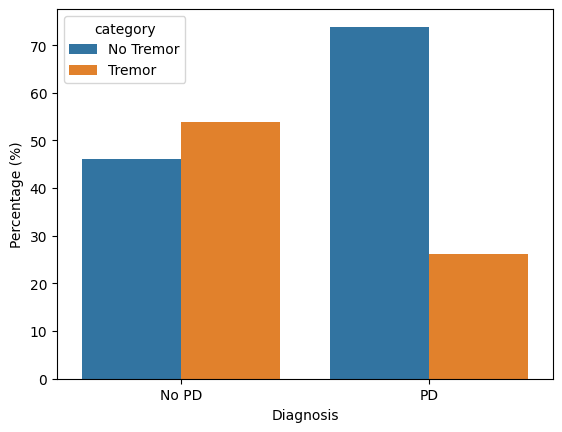

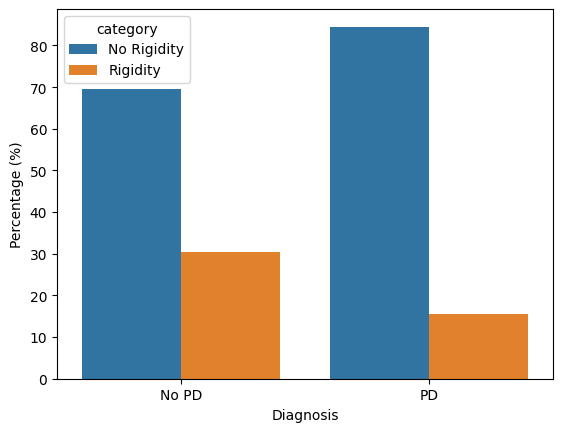

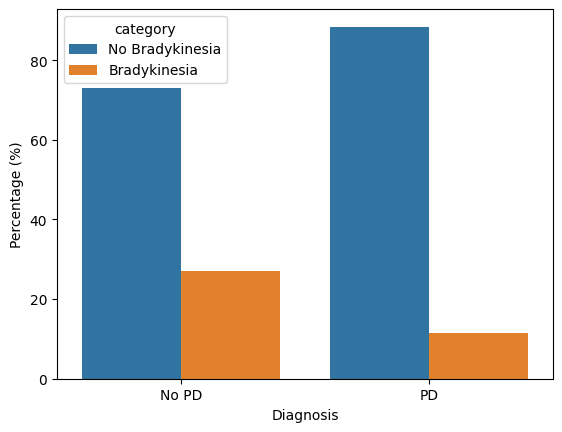

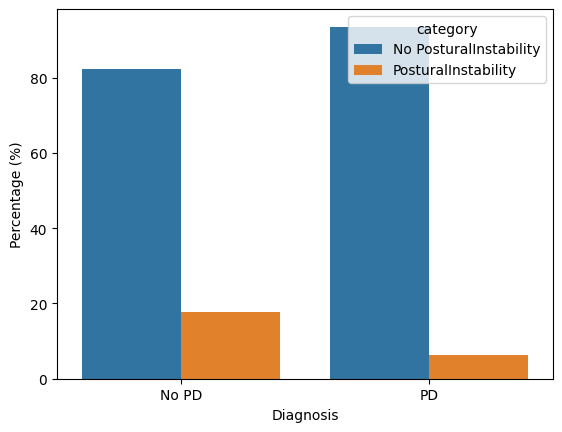

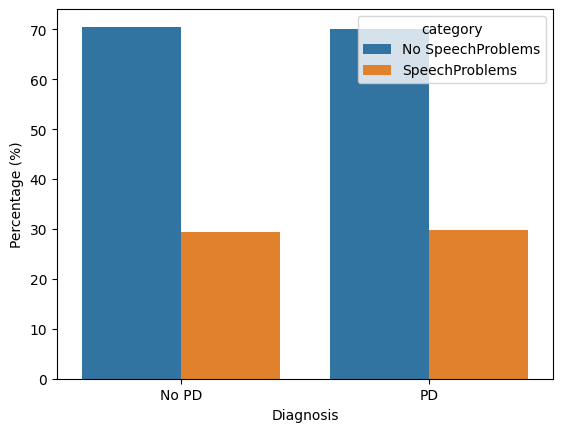

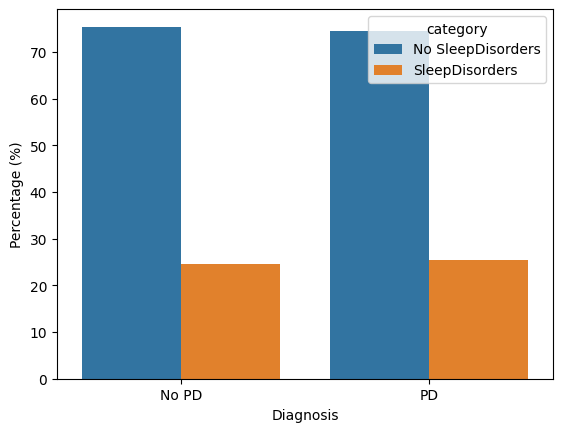

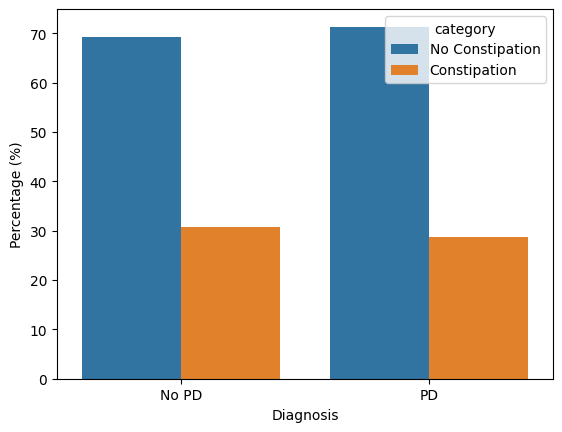

In [147]:
categorical_columns=['Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation']
for i,j in enumerate(categorical_columns):
    df_plot_both=(train_df[train_df.Diagnosis==1][j].value_counts(normalize=True).sort_index()*100).to_list()
    df_plot_both.extend((train_df[train_df.Diagnosis==0][j].value_counts(normalize=True).sort_index()*100).to_list())
    df_plot=pd.DataFrame({"Diagnosis":["No PD","No PD","PD","PD"],"value":df_plot_both,"category":["No "+j,j,"No "+j,j]})
    ax=sns.barplot(data=df_plot,x="Diagnosis",y="value",hue="category")
    ax.set_ylabel("Percentage (%)")
    plt.show()

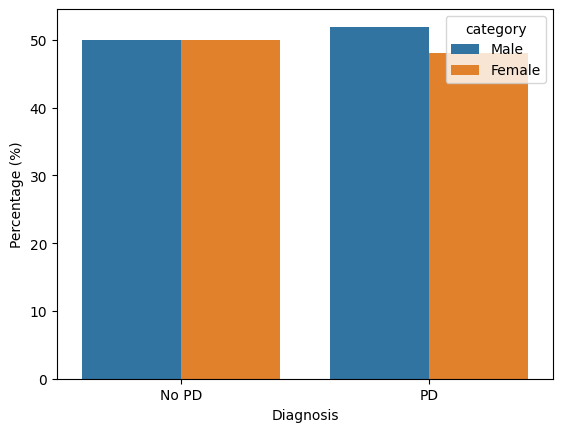

In [148]:
df_plot_both=(train_df[train_df.Diagnosis==1]["Gender"].value_counts(normalize=True,sort=False).sort_index()*100).to_list()
df_plot_both.extend((train_df[train_df.Diagnosis==0]["Gender"].value_counts(normalize=True,sort=False).sort_index()*100).to_list())
df_plot=pd.DataFrame({"Diagnosis":["No PD","No PD","PD","PD"],"value":df_plot_both,"category":["Male","Female","Male","Female"]})
ax=sns.barplot(data=df_plot,x="Diagnosis",y="value",hue="category")
ax.set_ylabel("Percentage (%)")
plt.show()

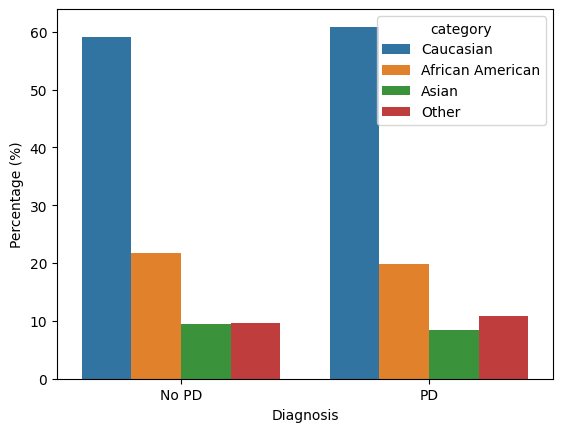

In [149]:
df_plot_both=(train_df[train_df.Diagnosis==1]['Ethnicity'].value_counts(normalize=True).sort_index()*100).to_list()
df_plot_both.extend((train_df[train_df.Diagnosis==0]['Ethnicity'].value_counts(normalize=True).sort_index()*100).to_list())
df_plot=pd.DataFrame({"Diagnosis":["No PD","No PD","No PD","No PD","PD","PD","PD","PD"],"value":df_plot_both,"category":["Caucasian", "African American","Asian","Other","Caucasian", "African American","Asian","Other"]})
ax=sns.barplot(data=df_plot,x="Diagnosis",y="value",hue="category")
ax.set_ylabel("Percentage (%)")
plt.show()

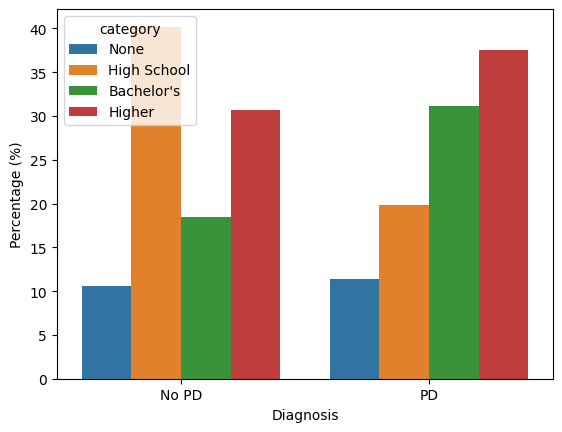

In [151]:
df_plot_both=(train_df[train_df.Diagnosis==1]['EducationLevel'].value_counts(normalize=True,sort=False)*100).to_list()
df_plot_both.extend((train_df[train_df.Diagnosis==0]['EducationLevel'].value_counts(normalize=True,sort=False)*100).to_list())
df_plot=pd.DataFrame({"Diagnosis":["No PD","No PD","No PD","No PD","PD","PD","PD","PD"],"value":df_plot_both,"category":["None", "High School", "Bachelor's","Higher","None", "High School", "Bachelor's","Higher"]})
ax=sns.barplot(data=df_plot,x="Diagnosis",y="value",hue="category")
ax.set_ylabel("Percentage (%)")
plt.show()

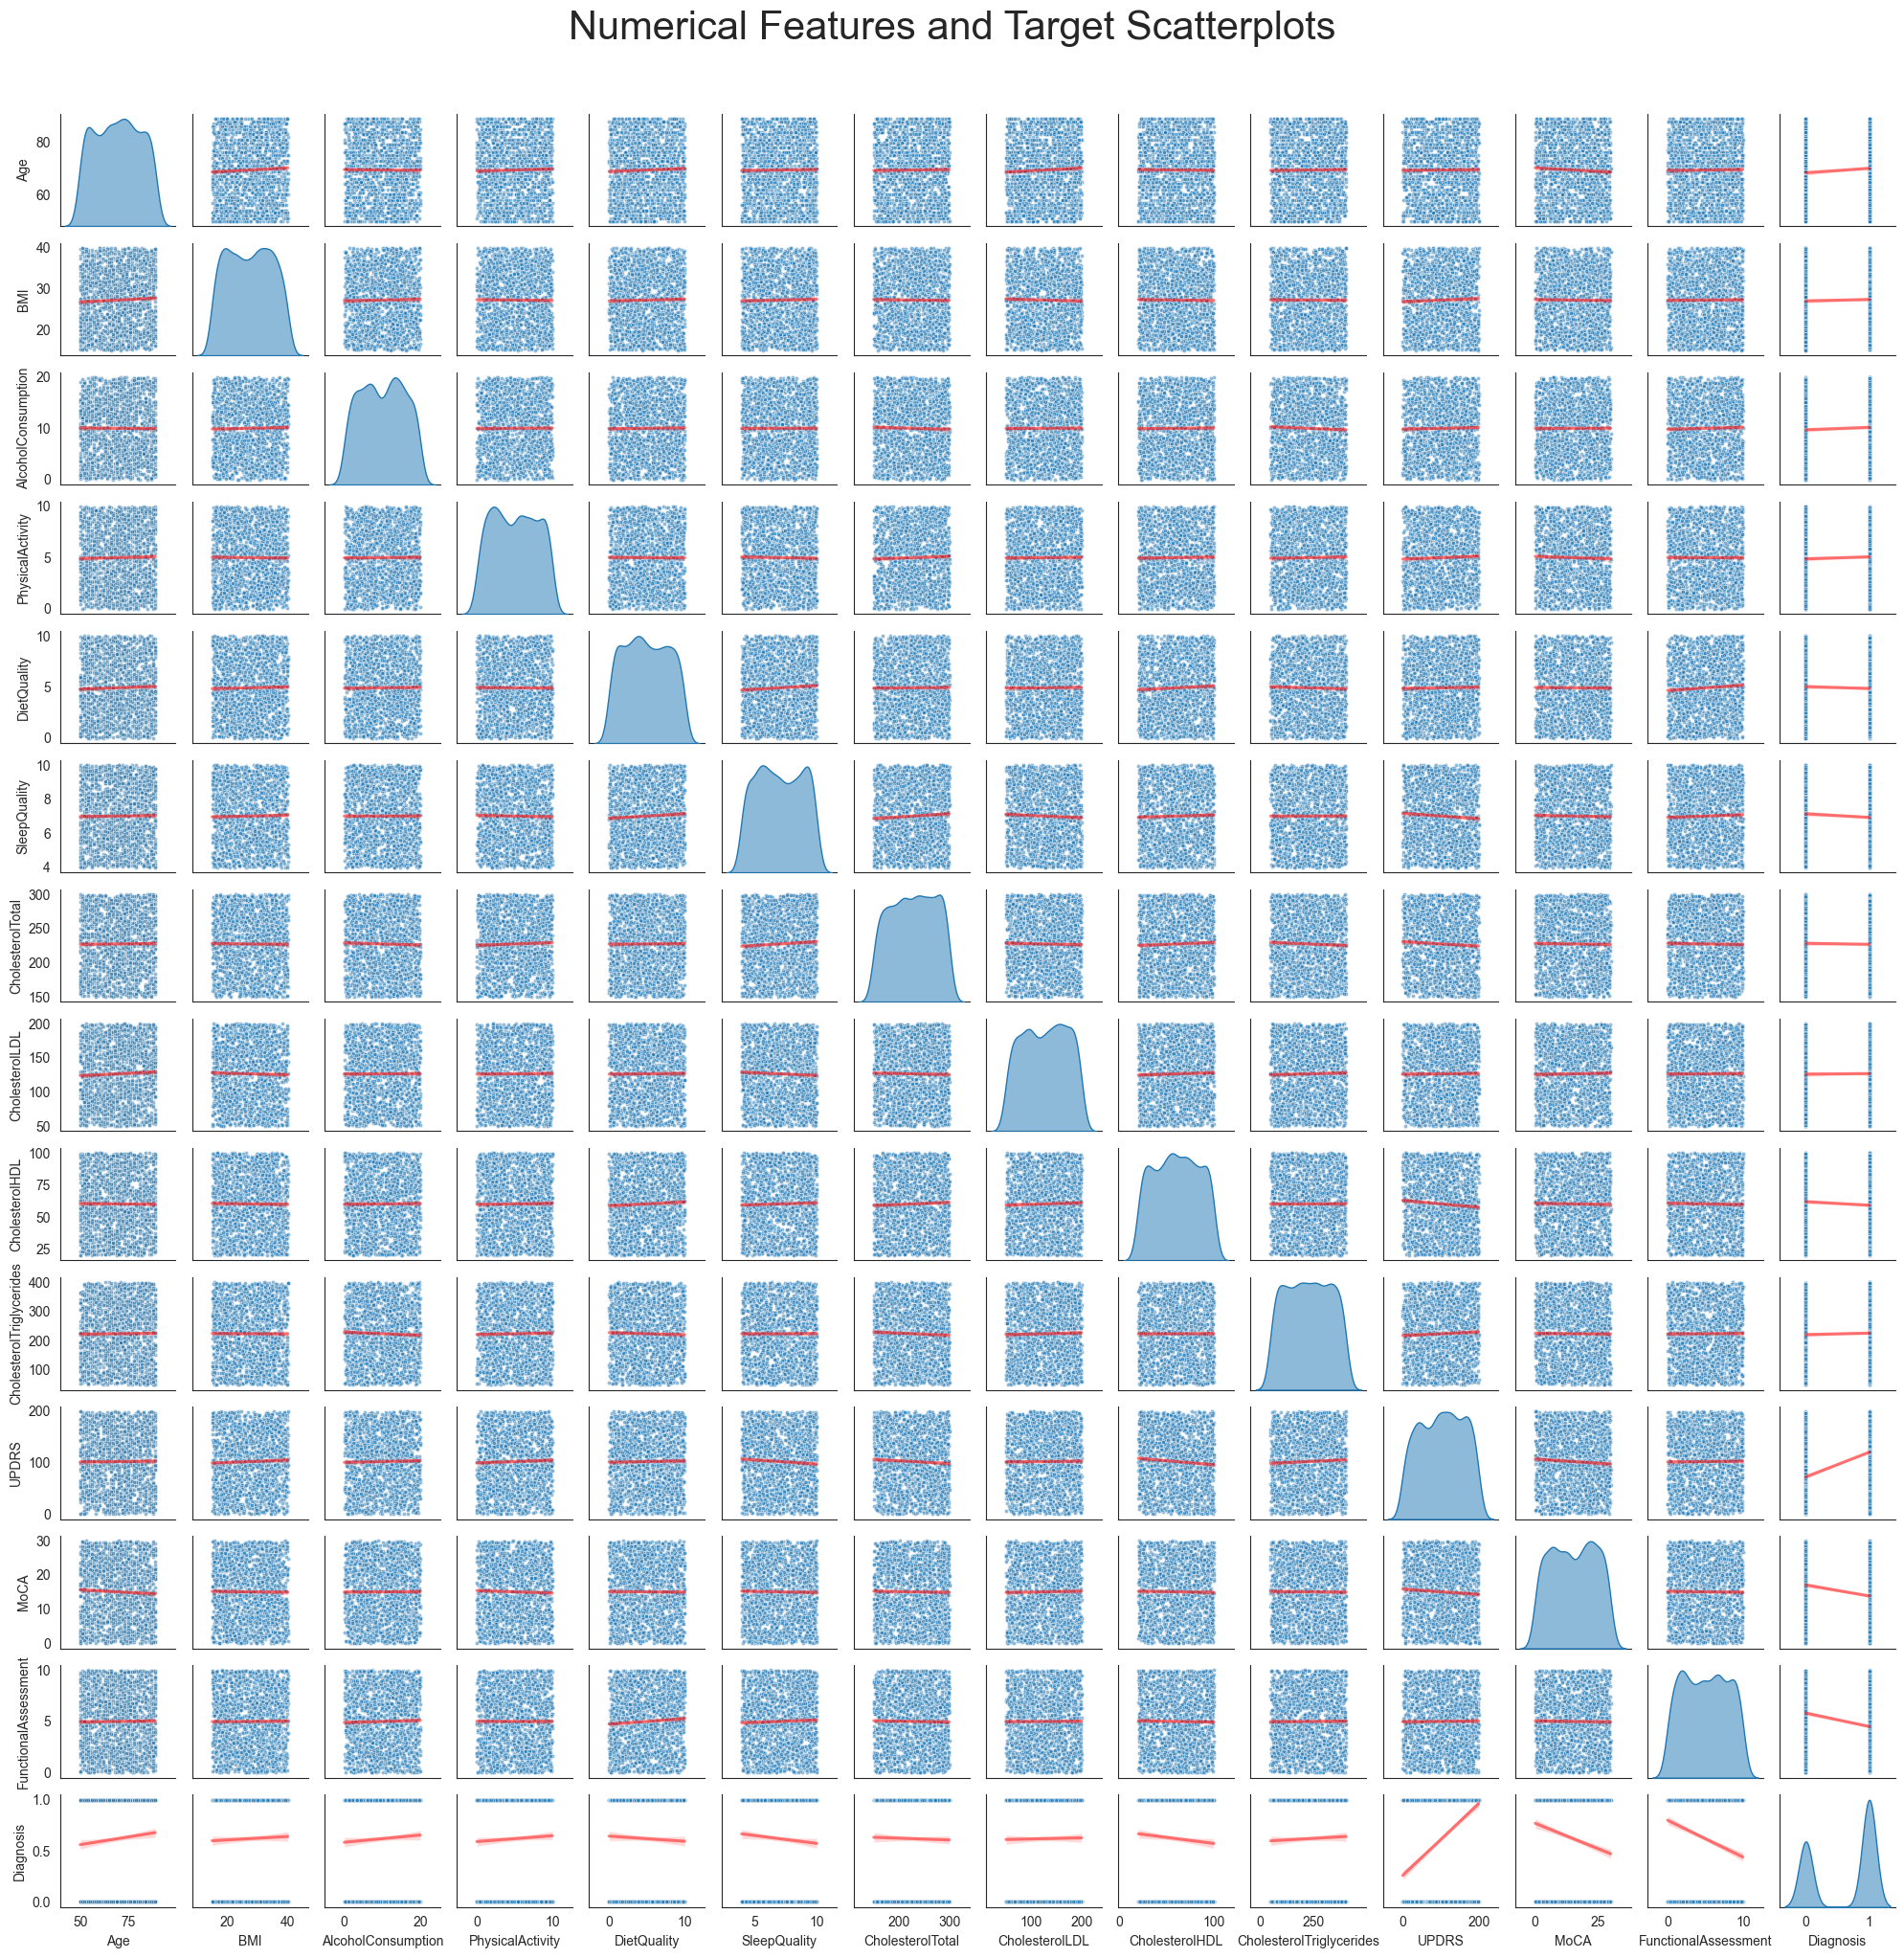

In [156]:
num_features=["Age","BMI","AlcoholConsumption","PhysicalActivity","DietQuality","SleepQuality","CholesterolTotal","CholesterolLDL","CholesterolHDL","CholesterolTriglycerides","UPDRS","MoCA","FunctionalAssessment","Diagnosis"]
sns.set_style("white")
g=sns.pairplot(data=train_df[num_features],kind="reg",diag_kind="kde",markers=".",plot_kws={"scatter_kws":{"edgecolor":"white","linewidths":0.5,"alpha":0.5},"line_kws":dict(color="r",alpha=0.5)},diag_kws={"alpha":0.5});
g.figure.suptitle("Numerical Features and Target Scatterplots", y=1.02,fontsize=30)
plt.gcf().set_size_inches(20,20)
plt.tight_layout();

In [ ]:
""